In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from utils import computehoughTransformCoord, simulateSigma

height = 64
width = 64
image0 = np.zeros((height, width), dtype=np.uint8) 

In [20]:
high = 110
low = 70
noise = 10
blur = 2
thetaList, rhoList = simulateSigma(image0, noise, low, high, iterNum=2000, draw=True, Blur=True, Blur_std=blur, List=True)

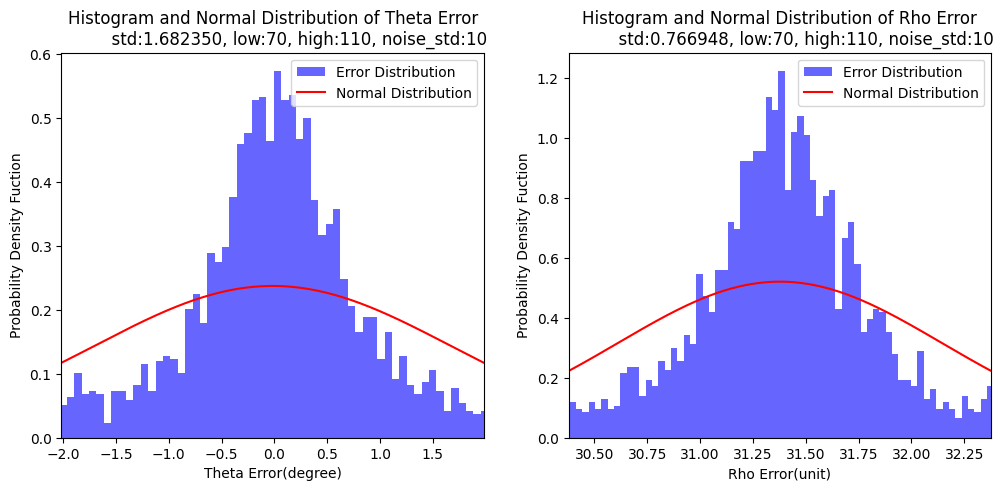

In [21]:
# thetaList = np.sin(np.radians(thetaList))

# 计算thetaList的均值和方差
mean = np.mean(thetaList)
std_dev = np.std(thetaList)

mean_rho = np.mean(rhoList)
std_rho = np.std(rhoList)

d1 = 2
d2 = 1

# 生成正态分布曲线的x值
x = np.linspace(mean - d1, mean + d1, 1000)

# 生成正态分布曲线的y值
y = norm.pdf(x, mean, std_dev)

# 绘制直方图
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.hist(thetaList, bins=200, density=True, alpha=0.6, color='b', label='Error Distribution')

# 绘制正态分布曲线
plt.plot(x, y, 'r', label='Normal Distribution')
plt.xlabel('Theta Error(degree)')
plt.ylabel('Probability Density Fuction')
plt.title(f'Histogram and Normal Distribution of Theta Error\n\
          std:{std_dev:4f}, low:{low}, high:{high}, noise_std:{noise}')
plt.xlim(mean - d1, mean + d1)
plt.legend()

# 生成正态分布曲线的x值
x = np.linspace(mean_rho - d2, mean_rho + d2, 1000)

# 生成正态分布曲线的y值
y = norm.pdf(x, mean_rho, std_rho)

# 绘制直方图
plt.subplot(1, 2, 2)
plt.hist(rhoList, bins=200, density=True, alpha=0.6, color='b', label='Error Distribution')

# 绘制正态分布曲线
plt.plot(x, y, 'r', label='Normal Distribution')
plt.xlabel('Rho Error(unit)')
plt.ylabel('Probability Density Fuction')
plt.title(f'Histogram and Normal Distribution of Rho Error\n\
          std:{std_rho:4f}, low:{low}, high:{high}, noise_std:{noise}')
plt.xlim(mean_rho - d2, mean_rho + d2)
plt.legend()

plt.savefig(f"Results/Distribution_high{high}_low{low}_noise{noise}_blur{blur}.png")
plt.show()